In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#### Read data from file

In [3]:
df = pd.read_csv("./epa-sea-level.csv", header=0)
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


#### Rise in Sea Level

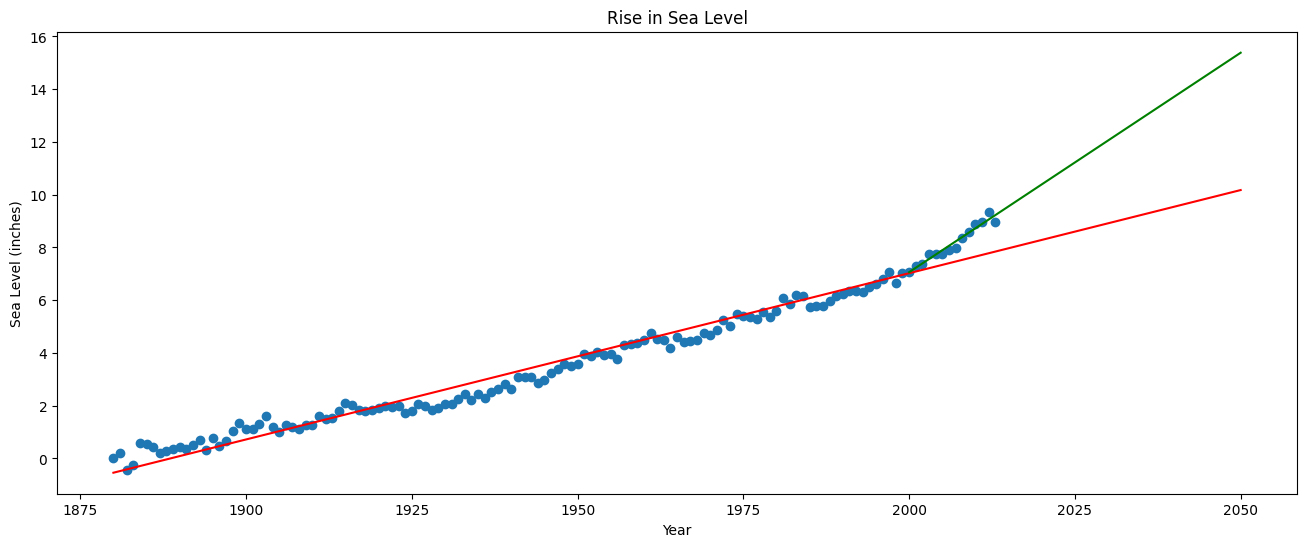

In [5]:
#Set ups for regressions

res1 = linregress(df.Year, df["CSIRO Adjusted Sea Level"])
extended_years = np.arange(1880, 2051, 1)

res2 = linregress(df[df.Year >= 2000].Year, df[df.Year >= 2000]["CSIRO Adjusted Sea Level"])
extended_years2 = np.arange(2000, 2051, 1)


# Create scatter plot

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x=df.Year, y=df["CSIRO Adjusted Sea Level"], label="Rise in Sea Level")

# Create first line of best fit

ax.plot(extended_years, res1.intercept + res1.slope * extended_years, 'r')

# Create second line of best fit

ax.plot(extended_years2, res2.intercept + res2.slope * extended_years2, 'g')

# Add labels and title

ax.set_title("Rise in Sea Level")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")

plt.show()